Assignment
( Note: You’re free to use any programming language (Python, R, Julia) that you’re familiar with and include the code together with your analysis.)

Perform exploratory analysis and extract insights from the dataset.
Split the dataset into train/test sets and explain your reasoning.
Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
Establish metrics to evaluate model performance.
Discuss the potential issues with deploying the model into production.

# 1. Exploratory Analysis and Extract Insights

In [2]:
!python --version

Python 3.12.4


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [121]:
#how to read the dataset
dataset = pd.read_csv("Customer_Churn.csv")

In [122]:
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [124]:
#Null/Missing values are not there
#drop unnecessary column

In [125]:
print(dataset.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [126]:
# see if every row is unique to one customer
dataset["phone number"].nunique()

3333

In [127]:
dataset["state"].nunique()

51

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [129]:
dataset['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [130]:
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [131]:
dataset = pd.get_dummies(dataset,columns=['area code'])

In [132]:
dataset

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510
0,KS,128,382-4657,no,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,False,True,False
1,OH,107,371-7191,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,False,True,False
2,NJ,137,358-1921,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,False,True,False
3,OH,84,375-9999,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,True,False,False
4,OK,75,330-6626,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,414-4276,no,yes,36,156.2,77,26.55,215.5,...,83,12.56,9.9,6,2.67,2,False,False,True,False
3329,WV,68,370-3271,no,no,0,231.1,57,39.29,153.4,...,123,8.61,9.6,4,2.59,3,False,False,True,False
3330,RI,28,328-8230,no,no,0,180.8,109,30.74,288.8,...,91,8.64,14.1,6,3.81,2,False,False,False,True
3331,CT,184,364-6381,yes,no,0,213.8,105,36.35,159.6,...,137,6.26,5.0,10,1.35,2,False,False,False,True


In [133]:
dataset.columns

Index(['state', 'account length', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'area code_408', 'area code_415', 'area code_510'],
      dtype='object')

In [134]:
dataset['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [135]:
dataset['international plan']=np.where(dataset['international plan']=='no',0 ,1)

In [136]:
print(dataset['international plan'].value_counts())

international plan
0    3010
1     323
Name: count, dtype: int64


In [137]:
dataset

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510
0,KS,128,382-4657,0,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,False,True,False
1,OH,107,371-7191,0,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,False,True,False
2,NJ,137,358-1921,0,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,False,True,False
3,OH,84,375-9999,1,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,True,False,False
4,OK,75,330-6626,1,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,414-4276,0,yes,36,156.2,77,26.55,215.5,...,83,12.56,9.9,6,2.67,2,False,False,True,False
3329,WV,68,370-3271,0,no,0,231.1,57,39.29,153.4,...,123,8.61,9.6,4,2.59,3,False,False,True,False
3330,RI,28,328-8230,0,no,0,180.8,109,30.74,288.8,...,91,8.64,14.1,6,3.81,2,False,False,False,True
3331,CT,184,364-6381,1,no,0,213.8,105,36.35,159.6,...,137,6.26,5.0,10,1.35,2,False,False,False,True


In [138]:
print(dataset['voice mail plan'].value_counts())

voice mail plan
no     2411
yes     922
Name: count, dtype: int64


In [139]:
dataset['voice mail plan']=np.where(dataset['voice mail plan']=='no',0,1)

In [145]:
dataset = dataset.drop(columns=['state','phone number'])

In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int32  
 2   voice mail plan         3333 non-null   int32  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

# Checking the outliers

In [164]:
dataset.isnull().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
area code_408             0
area code_415             0
area code_510             0
dtype: int64

In [165]:
dataset.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [166]:
dataset.select_dtypes(exclude=['object']).columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'area code_408',
       'area code_415', 'area code_510'],
      dtype='object')

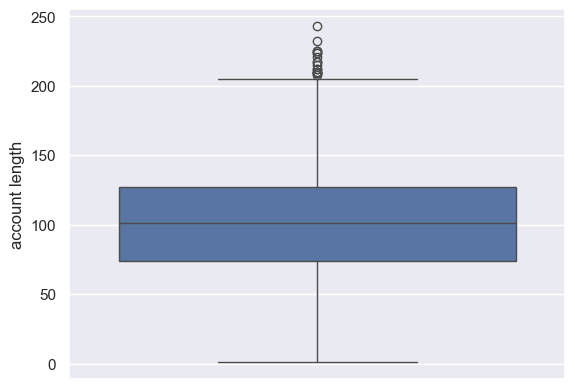

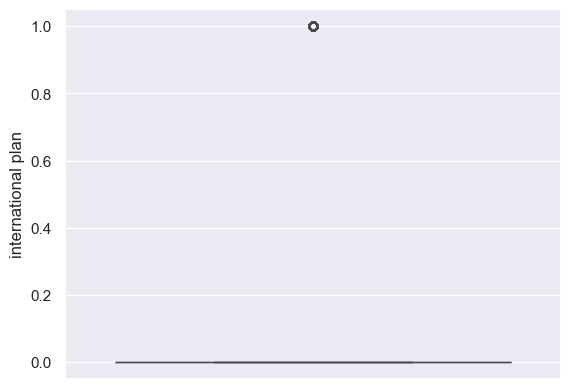

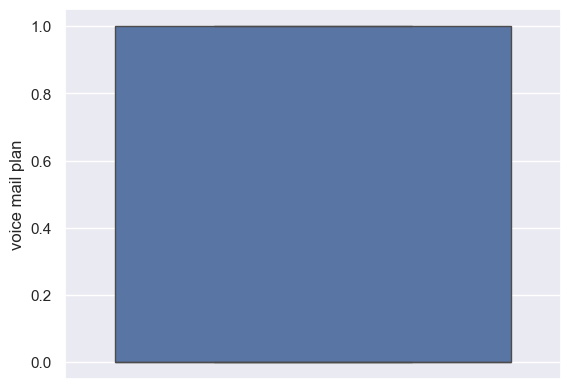

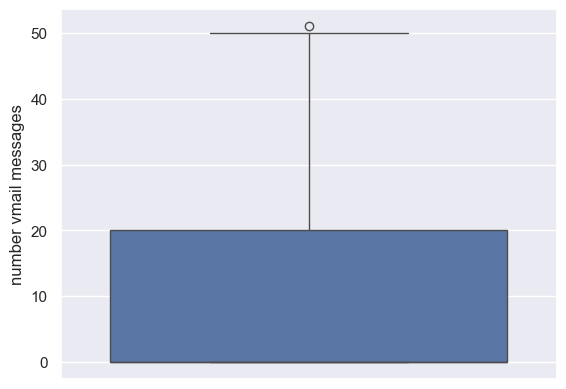

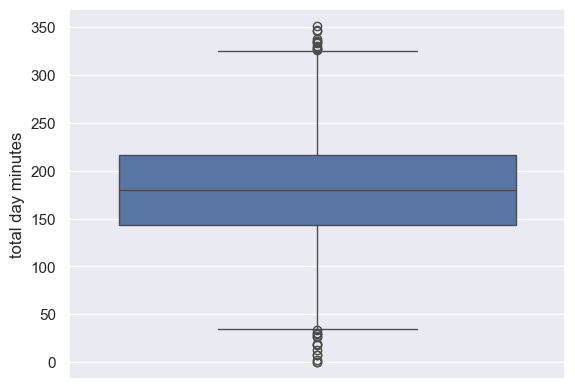

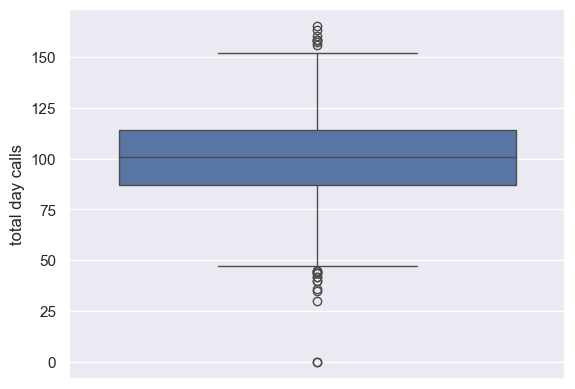

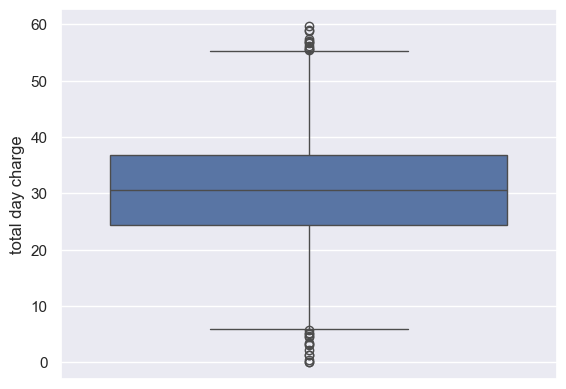

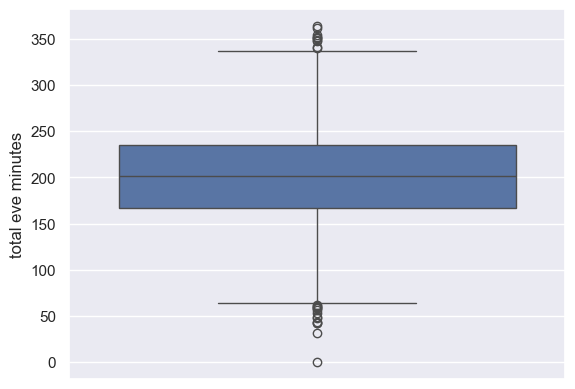

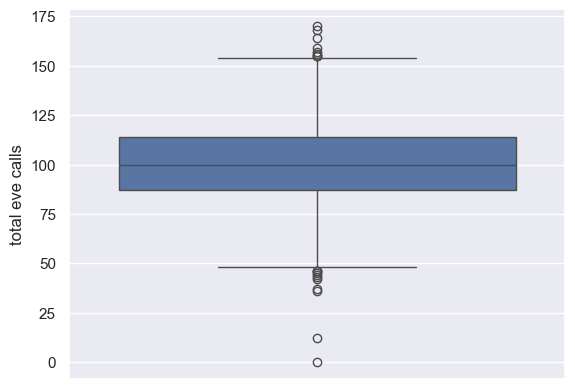

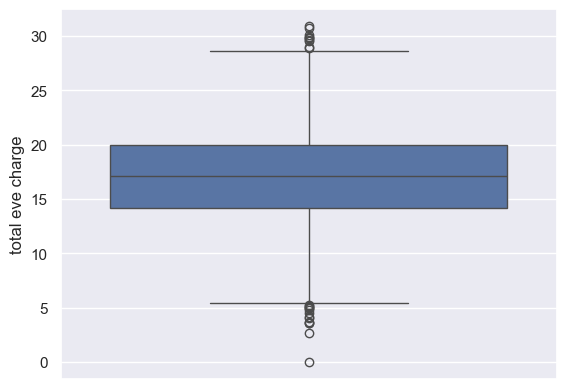

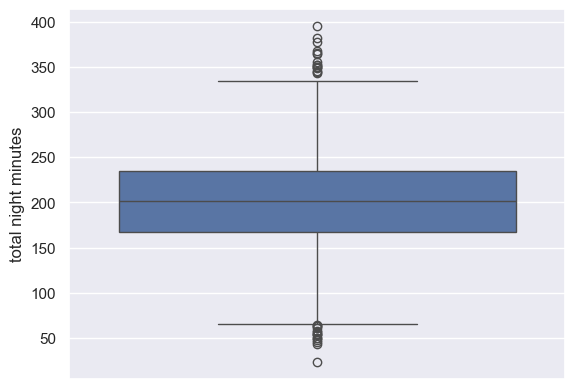

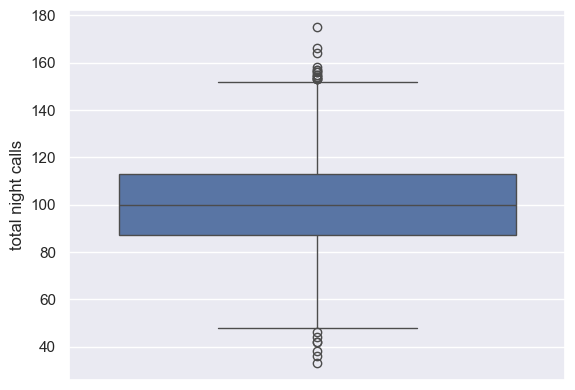

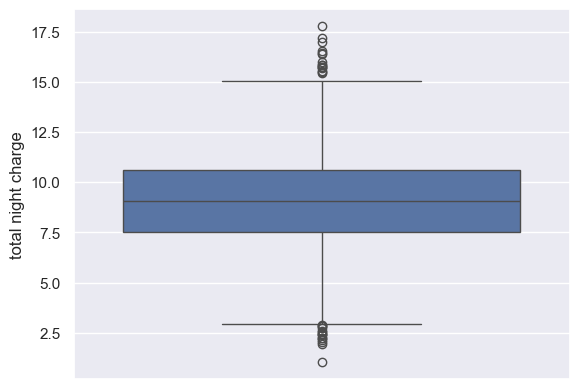

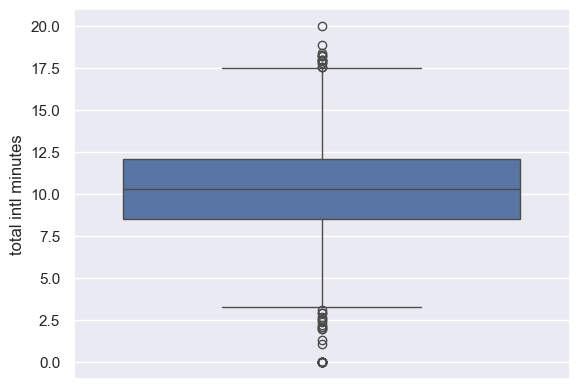

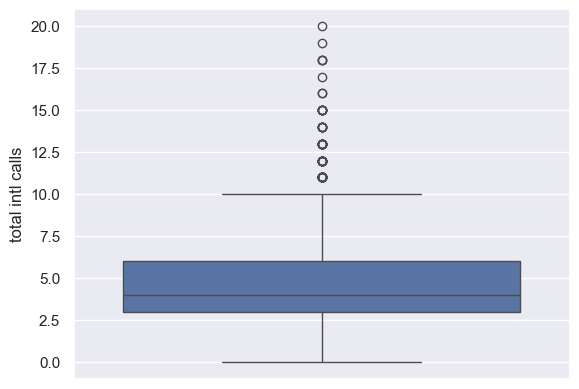

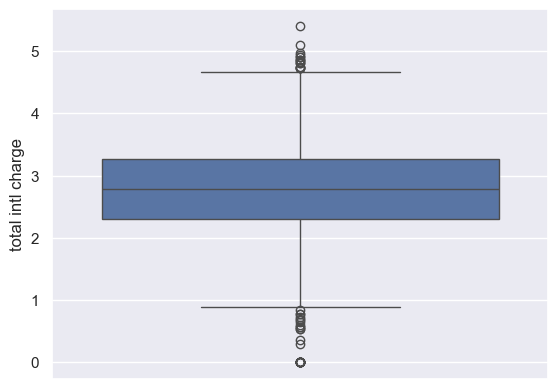

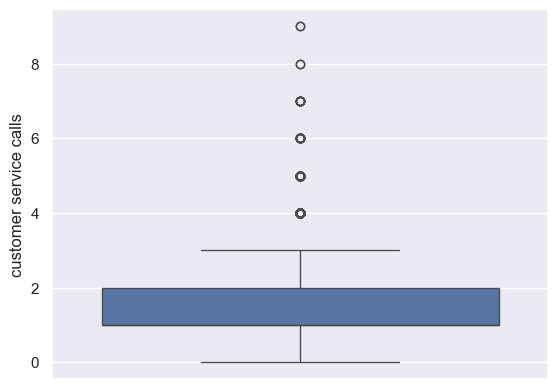

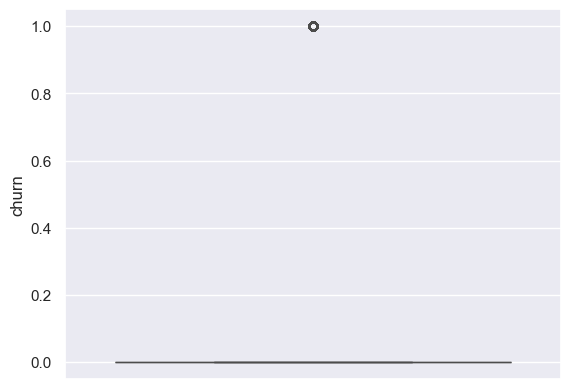

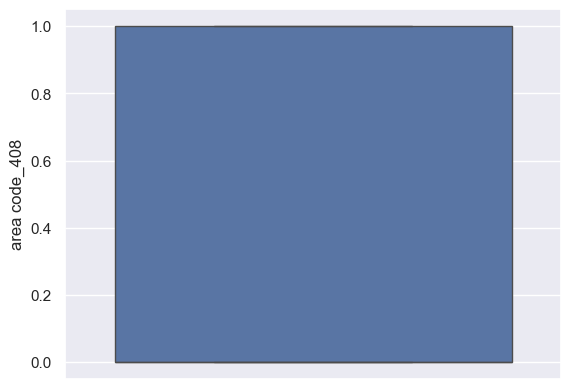

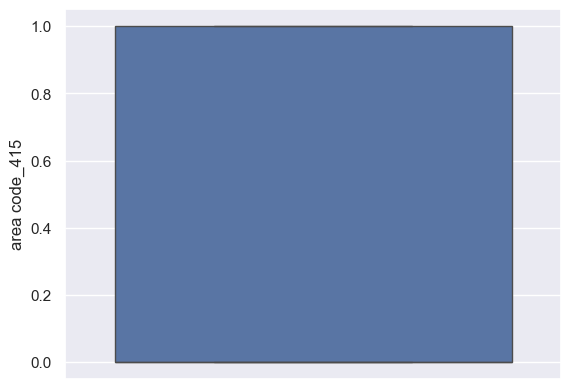

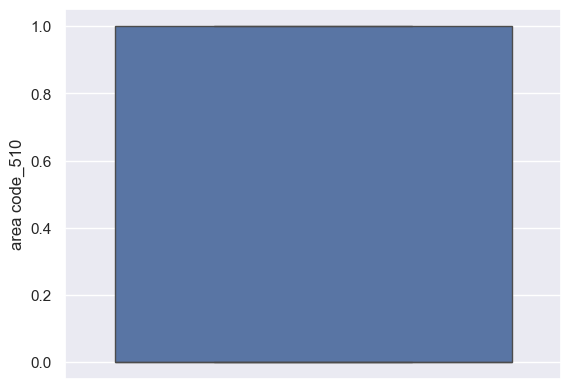

In [175]:
import seaborn as sns
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()

for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)
    

# Applying the standardisation

In [147]:
df_final = dataset.copy()

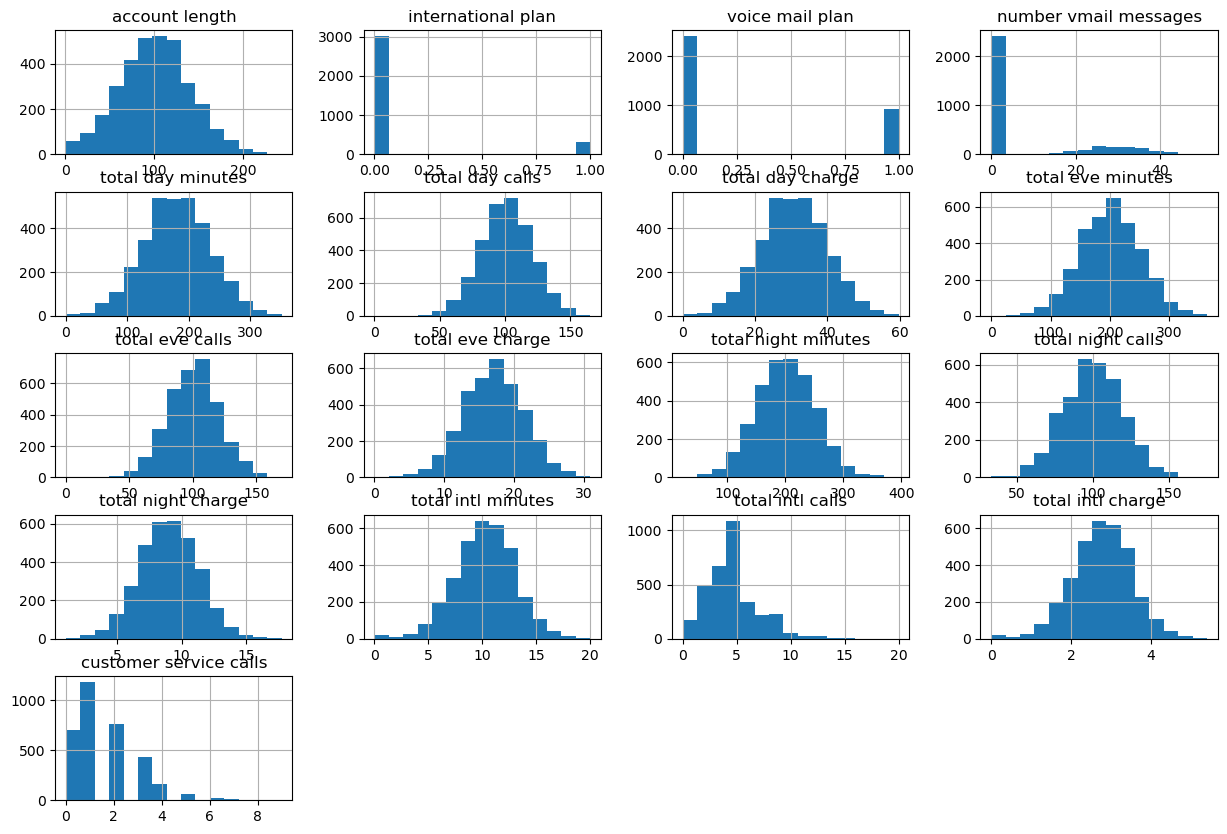

In [148]:
df_final.hist(figsize=(15,10),bins=15)
plt.show()

In [149]:
df_final['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [150]:
df_final['churn'] = df_final['churn'].astype('category')
df_final['churn']= df_final['churn'].cat.codes

In [151]:
df_final['churn'] 

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int8

In [152]:
import imblearn

In [153]:
x = df_final.drop(columns=['churn'])

In [154]:
y = df_final['churn']

In [155]:
x.shape,y.shape

((3333, 20), (3333,))

In [156]:
x.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,True,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,True,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,True,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,True,False,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,True,False


In [157]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int8

In [158]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int32  
 2   voice mail plan         3333 non-null   int32  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [159]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_smote,y_smote = smt.fit_resample(x,y)

In [160]:
print("Original Count :", y.value_counts())
print("**************"*10)
print("After Oversampling :", y_smote.value_counts())
print("***************"*10)
print("Now new datashape is :", x_smote.shape)

Original Count : churn
0    2850
1     483
Name: count, dtype: int64
********************************************************************************************************************************************
After Oversampling : churn
0    2850
1    2850
Name: count, dtype: int64
******************************************************************************************************************************************************
Now new datashape is : (5700, 20)
